# Data Sketches
## An Exercise Inspired by *Data Sketches* by Nadieh Bremer and Shirley Wu 

### This exercise should be completed in groups - imagine working with a data visualization expert to sketch both the concept and the plan for a large visualization project. What do you want to accomplish? Is this meant mainly to communicate or is it meant to enable discovery? 

## Part 1: Brainstorm

Start out by thinking about some datasets that exhibit sufficient complexity to reward a visualization. The dataset you pick should reward Edward Tufte's aphorism that "Beautiful Graphics do not traffic with the trivial." 

If you are unable to think of some interesting data sets, I've included a few possibilities here:

Gravitational Wave Sources: https://zenodo.org/record/5655785#.Y_wnKS-B0xU 

Exoplanet Light Curves: https://exoplanetarchive.ipac.caltech.edu 

Solar System Orbits: https://ssd.jpl.nasa.gov/horizons/app.html#/ 

US Census Data: https://data.census.gov 

High Speed Rail in France: https://ressources.data.sncf.com/pages/accueil/ (make your own Paris time series?) 

(let me know if you know of other cool datasets!) 

## Part 2: Open your tool box

These are some example plots that you might make to help visualize the data itself. Which of these would you include either in the discovery or the communication step in your visualization? How do you show the range of scales in your data? How do you allow for in depth exploration? What plots characterize or fit nicely with the type of data you're visualizing? What structure fits your data best? This will guide your sketch and form the basis for your visualization concept.

For more types of plots, see: 

https://matplotlib.org/stable/plot_types/index.html

https://seaborn.pydata.org

Note: Examples below are mostly taken from the matplotlib documentation with some slight modifications using concepts from: https://www.ajnisbet.com/blog/tufte-in-matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np

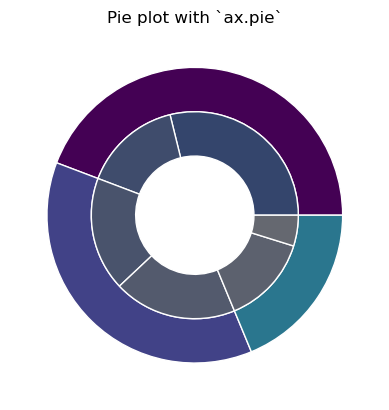

In [2]:
# Part to whole relationships 

fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.colormaps["cividis"]
cmap2 = plt.colormaps["viridis"]
outer_colors = cmap2(np.arange(3)*50)
inner_colors = cmap([50, 60, 70, 80, 90, 100])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

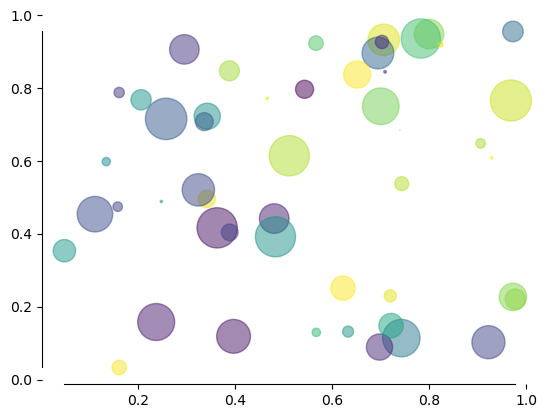

In [3]:
## Trends and Relationships - Scatter Plots 

np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

ax = plt.subplot(111)

ax.scatter(x, y, s=area, c=colors, alpha=0.5)

# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['bottom'].set_bounds(min(x), max(x))
ax.spines['left'].set_bounds(min(y), max(y))

plt.show()

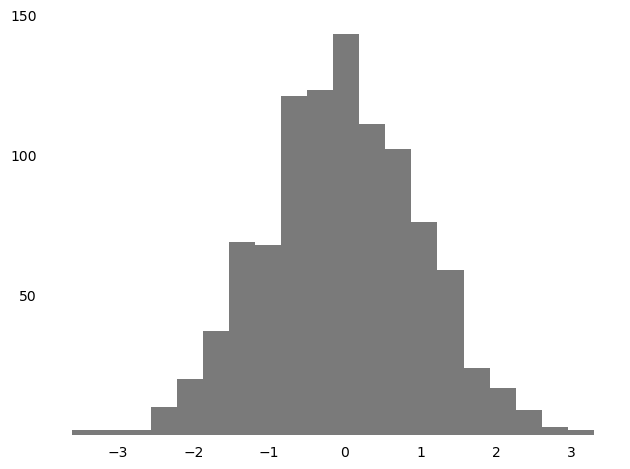

In [4]:
# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

N_points = 1000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)

fig, ax = plt.subplots(1, 1, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = ax.hist(dist1, bins=n_bins, color='#7a7a7a')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

y_ticks = [50, 100, 150]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks)

ax.tick_params(
    bottom=False,
    left=False, 
)
# ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

Text(0.5, 1.0, 'The default settings produce a diagram like this.')

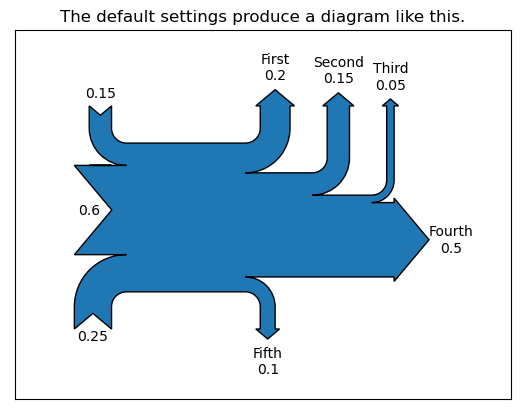

In [5]:
from matplotlib.sankey import Sankey

Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.")

## Part 3: Now sketch your concept. 

Consider the different modern paradigms we discussed. Will your sketch be interactive? How will people interact with it? What barriers might be present (intentional or otherwise)? What role do beauty and attention play in your concept? 



## Part 4: Now consider visual encodings

What colors will you choose for each part of your sketch? Which symbols? How will you ensure visual separation or treat hierarchies that might be present in your data? Do your choices of colors or symbols impact accessibility? 

## Part 5: Reflect

Finally, reflect on your visualization or visualizations. Is this something that you can actually build? Is this *useful*? If so, is it useful to communicate or to discover? 

In [10]:
import pandas as pd
sncf = pd.read_csv('tgvmax.csv', delimiter=';')

In [13]:
sncf

,DATE,TRAIN_NO,ENTITY,Axe,Origine IATA,Destination IATA,Origine,Destination,Heure_depart,Heure_arrivee,Disponibilité de places MAX JEUNE et MAX SENIOR
0,2023-03-12,5062,JCSUDNORD,NORD,FRMLV,FRLLE,MARNE LA VALLEE CHESSY,LILLE (intramuros),12:55,14:24,OUI
1,2023-03-12,5062,JCSUDNORD,NORD,FRMLV,FRMLW,MARNE LA VALLEE CHESSY,AEROPORT CDG2 TGV ROISSY,12:55,13:04,OUI
2,2023-03-12,5062,JCSUDNORD,NORD,FRMLV,FRQRV,MARNE LA VALLEE CHESSY,ARRAS,12:55,13:56,OUI
3,2023-03-12,5062,JCSUDNORD,NORD,FRMLW,FRTHP,AEROPORT CDG2 TGV ROISSY,TGV HAUTE PICARDIE,13:09,13:36,OUI
4,2023-03-12,5062,JCSUDNORD,NORD,FRMPL,FRLPD,MONTPELLIER SAINT-ROCH,LYON (intramuros),08:59,10:50,OUI
...,...,...,...,...,...,...,...,...,...,...,...
352066,2023-03-22,8574,PASUDOUEST,ATLANTIQUE,FRPMO,FRGFI,PARIS (intramuros),ORTHEZ,14:02,18:02,NON
352067,2023-03-22,8574,PASUDOUEST,ATLANTIQUE,FRDJU,FRLDE,MASSY TGV,LOURDES,14:15,18:54,NON
352068,2023-03-22,8634,BRETAPARIS,ATLANTIQUE,FRBES,FRSBK,BREST,ST BRIEUC,15:32,16:38,OUI
352069,2023-03-22,7330,ARRASPA,NORD,FRQRV,FRPNO,ARRAS,PARIS (intramuros),17:18,18:08,OUI


In [14]:
len(pd.unique(sncf['Origine IATA']))

304

In [15]:
len(pd.unique(sncf['Destination IATA']))

305

In [16]:
stations = pd.unique(sncf['Destination IATA'])

In [28]:
from datetime import date, time, datetime

,DATE,TRAIN_NO,ENTITY,Axe,Origine IATA,Destination IATA,Origine,Destination,Heure_depart,Heure_arrivee,Disponibilité de places MAX JEUNE et MAX SENIOR
0,2023-03-12,5062,JCSUDNORD,NORD,FRMLV,FRLLE,MARNE LA VALLEE CHESSY,LILLE (intramuros),12:55,14:24,OUI
1,2023-03-12,5062,JCSUDNORD,NORD,FRMLV,FRMLW,MARNE LA VALLEE CHESSY,AEROPORT CDG2 TGV ROISSY,12:55,13:04,OUI
2,2023-03-12,5062,JCSUDNORD,NORD,FRMLV,FRQRV,MARNE LA VALLEE CHESSY,ARRAS,12:55,13:56,OUI
3,2023-03-12,5062,JCSUDNORD,NORD,FRMLW,FRTHP,AEROPORT CDG2 TGV ROISSY,TGV HAUTE PICARDIE,13:09,13:36,OUI
4,2023-03-12,5062,JCSUDNORD,NORD,FRMPL,FRLPD,MONTPELLIER SAINT-ROCH,LYON (intramuros),08:59,10:50,OUI
...,...,...,...,...,...,...,...,...,...,...,...
352066,2023-03-22,8574,PASUDOUEST,ATLANTIQUE,FRPMO,FRGFI,PARIS (intramuros),ORTHEZ,14:02,18:02,NON
352067,2023-03-22,8574,PASUDOUEST,ATLANTIQUE,FRDJU,FRLDE,MASSY TGV,LOURDES,14:15,18:54,NON
352068,2023-03-22,8634,BRETAPARIS,ATLANTIQUE,FRBES,FRSBK,BREST,ST BRIEUC,15:32,16:38,OUI
352069,2023-03-22,7330,ARRASPA,NORD,FRQRV,FRPNO,ARRAS,PARIS (intramuros),17:18,18:08,OUI


In [30]:
time_depart = [datetime.combine(date.fromisoformat(_.DATE), time(_.Heure_depart))]

In [35]:
t.timestamp()

1645986600.0